In [1]:
%matplotlib inline

In [2]:
import stats_enriched_tweets
from collections import defaultdict
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
from mpltools import style
import numpy as np
from collections import Counter, OrderedDict
import pandas as pd
import plotly.plotly as py

filename = "/Users/muntean/refugees-output/Final2/refugees_all.json"

/Library/Python/2.7/site-packages/mpltools/style/__init__.py:42: FutureWarning: 

    The style-sheet functionality in mpltools has been integrated into
    Matplotlib >= 1.4. This module will be removed in a future release.

    Note that style-sheets used by `matplotlib.style` use the standard
    Matplotlib rc-file syntax instead of the INI format used by `mpltools`.
    This mostly means un-quoting strings and changing '=' to ':'.


  """, FutureWarning)


# build indexes

In [3]:
# 1. tweet index
tweetIndex = stats_enriched_tweets.createTweetIndex(filename)
print len(tweetIndex)

100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1238724


In [4]:
# 2. masks over tweet index
dailyTweetsDict = stats_enriched_tweets.createDailyTweetsMask(tweetIndex)
print "Daily tweets - volumes:", len(dailyTweetsDict)
userCountryTweetsDict = stats_enriched_tweets.createUserCountryTweetsMask(tweetIndex)
print "User country tweets - volumes - EU:", len(userCountryTweetsDict)

Daily tweets - volumes: 40
User country tweets - volumes - EU: 51


# plot types

In [5]:
def plotBarWithLables(distrib, labels, title, rot=0):
    style.use('ggplot')
    plt.figure()
    ind = np.arange(len(distrib))
    plt.bar(ind, distrib, width = 0.75, align='center', color='k')
    plt.xticks(ind, labels, rotation=rot, fontsize = 10)
    plt.title(title, fontsize = 10)
    plt.ylabel('Volume', fontsize = 10)
    plt.tight_layout()
    plt.savefig("/Users/muntean/refugees-output/plots/" + title.replace(" ","_") + ".pdf")
    plt.show()

In [6]:
def plotBarWithLablesNew(distrib, labels, title, rot=0):
    style.use('ggplot')
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ind = np.arange(len(distrib))
    ax.bar(ind, distrib, width = 0.95, align='center', color='k')
    plt.xticks(ind, labels, rotation=rot, fontsize = 10)
    plt.xlim(xmin=-1)
#     plt.legend(loc='upper left')
    plt.title(title, fontsize = 10)
    plt.ylabel('Volume', fontsize = 10)
    plt.tight_layout()
    plt.savefig("/Users/muntean/refugees-output/plots/" + title.replace(" ","_") + ".pdf")
    plt.show()

In [7]:
def plotStackedBar():
    import numpy as np
    import matplotlib.pyplot as plt


    N = 5
    menMeans = (20, 35, 30, 35, 27)
    womenMeans = (25, 32, 34, 20, 25)
    menStd = (2, 3, 4, 1, 2)
    womenStd = (3, 5, 2, 3, 3)
    ind = np.arange(N)    # the x locations for the groups
    width = 0.35       # the width of the bars: can also be len(x) sequence

    p1 = plt.bar(ind, menMeans, width, color='r', yerr=menStd)
    p2 = plt.bar(ind, womenMeans, width, color='y',
                 bottom=menMeans, yerr=womenStd)

    plt.ylabel('Scores')
    plt.title('Scores by group and gender')
    plt.xticks(ind + width/2., ('G1', 'G2', 'G3', 'G4', 'G5'))
    plt.yticks(np.arange(0, 81, 10))
    plt.legend((p1[0], p2[0]), ('Men', 'Women'))

    plt.show()

In [8]:
def plotBarWithLables2Distrib(a,b, labels, title, rot=0):

    #style.use('ggplot')
    ind = np.arange(len(a))  # the x locations for the groups
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(ind, a, width, color='k')
    rects2 = ax.bar(ind + width, b, width, color='w', edgecolor='k')

    # add some text for labels, title and axes ticks
    ax.set_ylabel('Frequencies')
    ax.set_title(title)
    ax.set_xticks(ind + width)
    ax.set_xticklabels(labels)

    plt.setp(ax.get_xticklabels(), rotation=70, horizontalalignment='right')

    ax.legend((rects1[0], rects2[0]), ('Negative', 'Positive'), loc='upper left')
    
#     def autolabel(rects):
#         # attach some text labels
#         for rect in rects:
#             height = rect.get_height()
#             ax.text(rect.get_x() + rect.get_width() / 2., 1.05 * height,
#                     '%d' % int(height),
#                     ha='center', va='bottom')
    
#     autolabel(rects1)
#     autolabel(rects2)

#     plt.tight_layout()
    plt.savefig("/Users/muntean/refugees-output/plots/"+ title.replace(" ","_") + ".pdf")
    plt.show()

# plots literally

#### tweets per day

In [9]:
def plotTweetsPerDay(tweetsPerDayDict):
    tweetsPerDay = [[len(y), x] for x, y in tweetsPerDayDict.items() if x is not None and len(y)>20000]
    #print tweetsPerDay
    tweetsPerDay.sort(key = lambda row: row[1])
    #print tweetsPerDay
    print "Tweets per day", len(tweetsPerDay)
    values = list(zip(*tweetsPerDay)[0])
    #print values
    labels = list(zip(*tweetsPerDay)[1])
    new_labels = [str(x)[4:6]+"-"+str(x)[6:] for x in labels]
    print new_labels
    #print labels
    plotBarWithLablesNew(values, new_labels, "Number of tweets per day", rot=90)

Tweets per day 30
['08-05', '08-06', '08-11', '08-12', '08-13', '08-15', '08-16', '08-19', '08-20', '08-21', '08-22', '08-23', '08-24', '08-25', '08-26', '08-28', '08-29', '08-30', '09-01', '09-04', '09-06', '09-09', '09-10', '09-11', '09-12', '09-13', '09-14', '09-15', '09-16', '09-17']


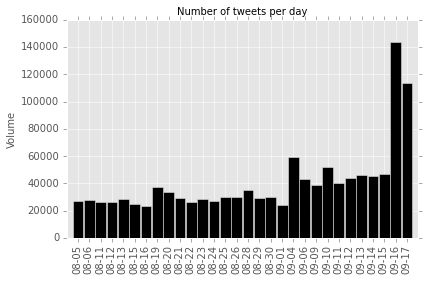

In [10]:
plotTweetsPerDay(dailyTweetsDict)

#### tweets per country

In [11]:
def plotTweetsPerCountry(tweetsPerCountryDict):
    """

    :param tweetsPerCountry: is a dictionary of key=country and values=list of tweets ids
    :return:
    """
    tweetsPerCountry = [[len(y), x] for x, y in tweetsPerCountryDict.items() if x is not None]
    tweetsPerCountry.sort(key = lambda row: row[0], reverse=True)
    values = list(zip(*tweetsPerCountry)[0])
    cummulative_values = np.cumsum(values)
#     labels = list(zip(*tweetsPerCountry)[1])
#     plotBarWithLablesNew(values[:20], labels[:20], "Number of tweets per country", rot=90)
#     plotBarWithLablesNew(cummulative_values[:20], labels[:20], "Cummulative number of tweets per country", rot=90)
    print cummulative_values
    print "GB", float(values[0])/cummulative_values[-1]
    print "FR", float(values[1])/cummulative_values[-1]
    print "DE", float(values[2])/cummulative_values[-1]

In [12]:
plotTweetsPerCountry(userCountryTweetsDict)

[ 57082  64181  70227  73464  76424  79117  81389  83650  85700  87318
  88911  90375  91711  92865  93821  94768  95689  96404  97082  97643
  98074  98456  98832  99123  99408  99692  99905 100118 100322 100514
 100689 100854 100967 101079 101182 101282 101366 101432 101493 101543
 101584 101624 101654 101677 101698 101710 101717 101724 101728 101731]
GB 0.561107233783
FR 0.069782072328
DE 0.0594312451465


In [13]:
#### top 20 countries per day / per everything
def top20countryMentions(dailyTweetsDict, tweetIndex):   
    # order chrono
    sortedDailyTweetsDict = sorted(x for x,k in dailyTweetsDict.iteritems() if len(k)>20000)
    print len(sortedDailyTweetsDict)
    
    countryMentions = list()
    for day, tweetList in dailyTweetsDict.iteritems():
        if day in sortedDailyTweetsDict:
            for tweet_id in tweetList:
                mentions = tweetIndex[tweet_id]["text_location_mentions_c"]  #list
                for mention in mentions:
                    countryMentions.append(mention)
    topCountryMentions = Counter(countryMentions).most_common(20)
    return topCountryMentions
         
top20CountryMentions = top20countryMentions(dailyTweetsDict, tweetIndex)
print top20CountryMentions

30
[(u'syria', 148192), (u'iran', 39406), (u'united kingdom', 32314), (u'iraq', 17767), (u'germany', 13766), (u'hungary', 13202), (u'israel', 10167), (u'ivory coast', 9086), (u'russia', 8535), (u'nigeria', 8141), (u'turkey', 7691), (u'yemen', 6362), (u'india', 5690), (u'france', 5485), (u'greece', 4925), (u'libya', 4683), (u'austria', 4677), (u'italy', 4200), (u'china', 3554), (u'lebanon', 3509)]


In [16]:
def top20countryMentionsPerDay(dailyTweetsDict, tweetIndex, top20CountryMentions):
    # order chrono
    sortedDailyTweetsDict = sorted(x for x,k in dailyTweetsDict.iteritems() if len(k)>20000)
    #print sortedDailyTweetsDict
    
    # getTopCountries
    topCountries = [x for [x,y] in top20CountryMentions]
    #print topCountries
    
    dailyMentions = dict() 
    for day, tweetList in dailyTweetsDict.iteritems():
        countryMentions = list()
        if day in sortedDailyTweetsDict:
            for tweet_id in tweetList:
                mentions = tweetIndex[tweet_id]["text_location_mentions_c"]  #list
                for mention in mentions:
                    if mention in topCountries:
                        countryMentions.append(mention)
            topMentions = Counter(countryMentions).most_common()
            #print topMentions
            orderedTopMentions = sorted(topMentions, key=lambda tup: tup[0])
            #print orderedTopMentions
            dailyMentions[day] = orderedTopMentions
            
    # orderd date keys chronologically
    sortedDailyMentions = OrderedDict(sorted(dailyMentions.items(), key=lambda t: t[0]))
    return sortedDailyMentions

dailyMentionDict = top20countryMentionsPerDay(dailyTweetsDict, tweetIndex, top20CountryMentions)
print dailyMentionDict.keys()
print dailyMentionDict[20150812]
print dailyMentionDict[20150815]

[20150805, 20150806, 20150811, 20150812, 20150813, 20150815, 20150816, 20150819, 20150820, 20150821, 20150822, 20150823, 20150824, 20150825, 20150826, 20150828, 20150829, 20150830, 20150901, 20150904, 20150906, 20150909, 20150910, 20150911, 20150912, 20150913, 20150914, 20150915, 20150916, 20150917]
[(u'austria', 6), (u'china', 151), (u'france', 111), (u'germany', 80), (u'greece', 112), (u'hungary', 13), (u'india', 80), (u'iran', 1653), (u'iraq', 697), (u'israel', 277), (u'italy', 73), (u'ivory coast', 229), (u'lebanon', 50), (u'libya', 132), (u'nigeria', 61), (u'russia', 186), (u'syria', 2083), (u'turkey', 383), (u'united kingdom', 584), (u'yemen', 203)]
[(u'austria', 6), (u'china', 65), (u'france', 126), (u'germany', 122), (u'greece', 80), (u'hungary', 19), (u'india', 152), (u'iran', 1333), (u'iraq', 635), (u'israel', 297), (u'italy', 75), (u'ivory coast', 279), (u'lebanon', 36), (u'libya', 291), (u'nigeria', 61), (u'russia', 270), (u'syria', 1822), (u'turkey', 230), (u'united kingdo

In [17]:
#### line plots
def plotLines(dailyMentionDict, top20CountryMentions):  
    # http://www.randalolson.com/2014/06/28/how-to-make-beautiful-data-visualizations-in-python-with-matplotlib/
    # Now that the plot is prepared, it's time to actually plot the data!    
    # Note that I plotted the majors in order of the highest % in the final year.    
    majors = ['Syria', 'Iran', 'United Kingdom', 'Iraq',    
              'Germany', 'Hungary', 'Israel',    
              'Ivory Coast', 'Russia', 'Nigeria',    
              'Turkey', 'Yemen', 'India',    
              'France', 'Greece', 'Libya',    
              'Austria', 'Italy', 'China', 'Lebanon'] 
    majors_alpha = sorted(majors) # 20 countries
    ind = range(len(majors_alpha)) # 0:19
    days = dailyMentionDict.keys() # 0:29

  
    # These are the "Tableau 20" colors as RGB.    
    tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
                 (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
                 (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
                 (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
                 (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    

    # Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
    for i in range(len(tableau20)):    
        r, g, b = tableau20[i]    
        tableau20[i] = (r / 255., g / 255., b / 255.)    

    # You typically want your plot to be ~1.33x wider than tall. This plot is a rare    
    # exception because of the number of lines being plotted on it.    
    # Common sizes: (10, 7.5) and (12, 9)    
    country_lines = plt.figure(figsize=(12, 14))    

    # Remove the plot frame lines. They are unnecessary chartjunk.    
    ax = plt.subplot(111)    
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)    

    # Ensure that the axis ticks only show up on the bottom and left of the plot.    
    # Ticks on the right and top of the plot are generally unnecessary chartjunk.    
    ax.get_xaxis().tick_bottom()    
    ax.get_yaxis().tick_left()    

#     Limit the range of the plot to only where the data is.    
#     Avoid unnecessary whitespace.    
#     plt.ylim(-1, 15000)    
#     plt.xlim(-1, 35)    

    # Make sure your axis ticks are large enough to be easily read.    
    # You don't want your viewers squinting to read your plot.    
    plt.yticks(range(0, 13000, 1000), [str(x) for x in range(0, 13000, 1000)], fontsize=10)    
    plt.xticks(range(30), days, fontsize=10, rotation=90)     
    
    ### devo iterare il dizionario in modo verticale
    selected_countries = [x for [x,y] in top20CountryMentions[:10]]
    print selected_countries
    for rank in ind:           
        country = majors_alpha[rank]
        #if country.lower() not in selected_countries:
        #    continue
            
        countryValues = list()
        for day in days:
            countryValues.append(dailyMentionDict[day][rank][1])
        #N = sum(countryValues)
        #countryValues = [float(x)/N for x in countryValues]
        if max(countryValues)<1000: continue
        plt.semilogy(range(30), np.cumsum(countryValues), lw=2.5, color=tableau20[rank], label = majors_alpha[rank])  
        
    plt.legend(loc='upper left')
#     plt.savefig("/Users/muntean/refugees-output/plots/Top_20_country_mentions_max1000_cumm_log.pdf")
#     plt.show()
    
    # Send updated figure object to Plotly, show result in notebook
    # https://plot.ly/python/line-and-scatter-plots-tutorial/
    # http://nbviewer.jupyter.org/github/plotly/python-user-guide/blob/master/s6_matplotlylib/s6_matplotlylib.ipynb
    # py.iplot(country_lines, filename='plotly-lines')

[u'syria', u'iran', u'united kingdom', u'iraq', u'germany', u'hungary', u'israel', u'ivory coast', u'russia', u'nigeria']


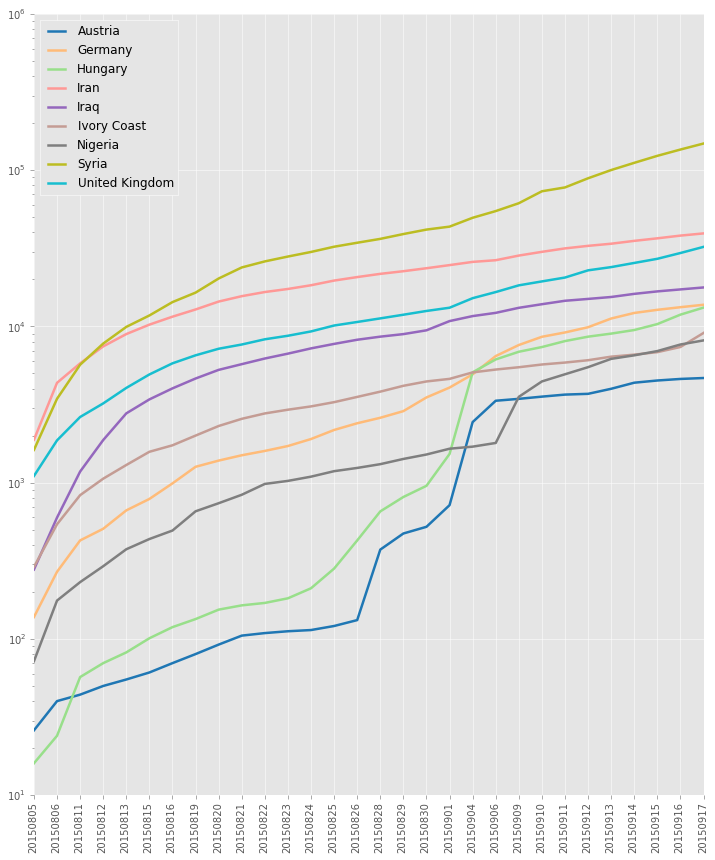

In [18]:
plotLines(dailyMentionDict, top20CountryMentions)

## mentions and sentiments

In [24]:
mentionSentiIndex = stats_enriched_tweets.buildCountrySentiIndexMention(filename)


In [29]:
def plotCountrySentimentPerDay(dailySentiDict, countryName, days, generic_title):
    labels = list()
    against = list()
    pro = list()

    dailySentiDictSorted = sorted(dailySentiDict.iteritems(), key=lambda x: x[0])  # order by date
    for record in dailySentiDictSorted:
        day = record[0]
        if day in days:
            sentiList = record[1]
            labels.append(day)
            count_pro = sentiList.count(1)
            pro.append(count_pro)
            count_anti = sentiList.count(0)
            against.append(count_anti)

    plotBarWithLables2Distrib(against, pro, labels, countryName.capitalize() + generic_title, rot=70)

days = dailyMentionDict.keys()   
print len(days)
# plotCountrySentimentPerDay(mentionSentiIndex["syria"], "syria", days)
# plotCountrySentimentPerDay(mentionSentiIndex["france"], "france", days)
# plotCountrySentimentPerDay(mentionSentiIndex["germany"], "germany", days)
# plotCountrySentimentPerDay(mentionSentiIndex["austria"], "austria", days)
# plotCountrySentimentPerDay(mentionSentiIndex["united kingdom"], "united kingdom", days)
# plotCountrySentimentPerDay(mentionSentiIndex["nigeria"], "nigeria", days)
# #http://www.voanews.com/media/photogallery/europe-migrant-crisis-september-16-2015/2966005.html
# #08.09:http://www.theguardian.com/world/video/2015/sep/08/journalist-appears-to-kick-and-trip-fleeing-refugees-video
# plotCountrySentimentPerDay(mentionSentiIndex["hungary"], "hungary", days)
# plotCountrySentimentPerDay(mentionSentiIndex["greece"], "greece", days)
# plotCountrySentimentPerDay(mentionSentiIndex["serbia"], "serbia", days)
# plotCountrySentimentPerDay(mentionSentiIndex["macedonia"], "macedonia", days)
# plotCountrySentimentPerDay(mentionSentiIndex["croatia"], "croatia", days)
# plotCountrySentimentPerDay(mentionSentiIndex["turkey"], "turkey", days)

30


## location mentions and uniq user sentiment


In [21]:
mixedMentionUser = stats_enriched_tweets.buildMixCountryMentionUserSenti(filename)

finished step 1
finished step 2


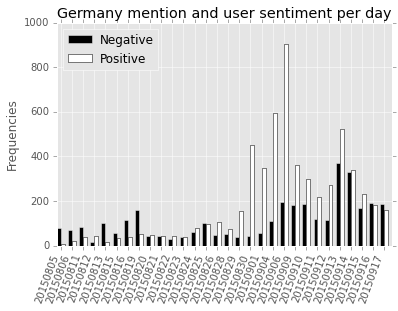

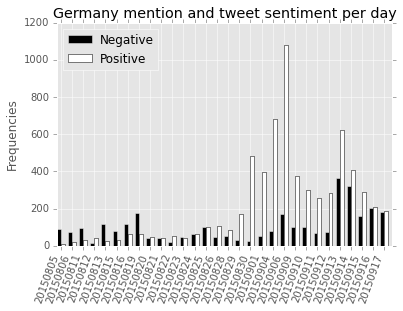

In [31]:
plotCountrySentimentPerDay(mixedMentionUser["germany"], "germany", days, " mention and user sentiment per day")
plotCountrySentimentPerDay(mentionSentiIndex["germany"], "germany", days, " mention and tweet sentiment per day")

In [25]:
print mixedMentionUser["germany"][20150917].count(0)
print mentionSentiIndex["germany"][20150917].count(0)

185
180


In [26]:
print mixedMentionUser["germany"][20150917].count(1)
print mentionSentiIndex["germany"][20150917].count(1)

158
185
